# Chapter 5. 정규선형모델

 * 정규선형모델: 종속변수(y)가 정규분포를 따르는 것을 가정한 선형 모델  

## 5.1. 연속형 독립변수가 하나인 모델(단순회귀)

  #### "날씨가 더울수록 맥주가 많이 팔릴까?"
  
  
 * 종속변수(y): 맥주매상
 * 독립변수(x): 기온
 
 
 * 목표: 기온(x)이 모델에 들어가는지 판단해보기

### 5.1.1. 분석준비

In [1]:
# 수치계산에 필요한 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 선형모델을 추정하는 라이브러리(경고가 나올 수 있습니다)
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 표시 자릿수 지정
%precision 3
# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

### 5.1.2. 데이터 읽어 들이기와 표시

In [38]:
# 맥주 매상 데이터
beer = pd.read_csv("sample/5-1-1-beer.csv")
print(beer.head())

   beer  temperature
0  45.3         20.5
1  59.3         25.0
2  40.4         10.0
3  38.0         26.9
4  37.0         15.8


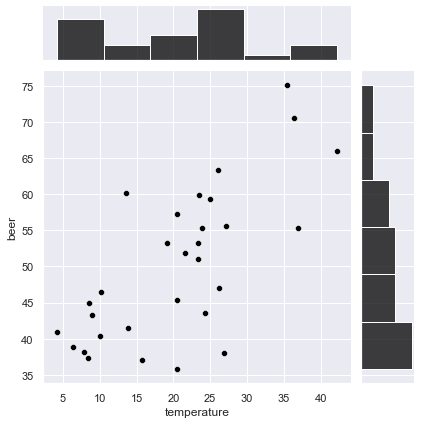

In [4]:
# 그래프
sns.jointplot(x = "temperature", y = "beer", data = beer, color = 'black')

### 5.1.4. statsmodels를 이용한 모델링

### 정규선형모델(statsmodels.formula.api.ols)
* 모델의 AIC : lm_model.aic
* 모델의 로그우도 : lm_model.llf
* 모델의 독립변수 수 : lm_model.df_model
* 모델 예측 값 : lm_model.predict()
* 모델 추정한 파라미터 : lm_model.params
* 모델 잔차 : lm_model.resid
* 모델 예측 값(2) : lm_model.fittedvalues
* 모델 결정계수 : lm_model.rsquared
* 모델 수정된 결정계수 : lm_model.rsquared_adj

In [5]:
# 정규선형모델 구축
# ols: Ordinary Least Squares(범용최소제곱법)
# formula : 종속변수가 beer, 독립변수가 temperature
# fit: 파라미터 추정까지 진행
lm_model = smf.ols(formula = "beer ~ temperature", data = beer).fit()

### 5.1.5. 추정 결과 표시와 계수 검정

* Dep. Variable : 종속변수의 이름
* Model : 종속변수이름
* Method : 범용최소제곱법을 사용
* No. Observations : 샘플사이즈
* Df Residuals : 샘슬사이즈에서 추정된 파라미터 수를 뺀 것
* Df Model : 사용된 독립변수의 수
* Covariance Type : 공분산 타입
* R-squared, Adj. R-squared : 결정계수와 자유도 조정이 끝난 결정계수(모델에 의한 추측치가 종속변수의 실제값과 일치하면 1)
* F-statistic, Prob (F-statistic) : 분산분석 결과(F가 크면 오차에 비해 효과가 크다)
* Log-Likelihood : 최대로그우도
* AIC : 아카이케 정보 기중
* BIC : 베이즈 정보 기준

In [8]:
# 추정결과 표시
lm_model.summary()    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Wed, 11 May 2022   Prob (F-statistic):           1.11e-05
Time:                        11:17:18   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### [summary 함수의 출력 내용 설명]
[표 1]


| 항목                           | 의미                                          |
| ------------------------------ | --------------------------------------------- |
| Dep.Variable                   | 종속변수의 이름(Depended Variable)            |
| Model, Method                  | 범용최소제곱법 사용                           |
| Date, Time                     | 모델 추정한 일시                              |
| No.Observations                | 샘플사이즈                                    |
| Df Residuals                   | 샘플사이즈에서 추정된 파라미터 수를 뺀 것     |
| Df Model                       | 사용된 독립변수의 수                          |
| Covariance Type                | 공분산 타입, 특별히 지정하지 않으면 nonrobust |
| R-squared, Adj.R-sqaured       | 결정계수와 자유도 조정이 끝난 결정계수        |
| F-Statistcs, Prob(F-Statistcs) | 분산분석 결과                                 |
| Log-Likelyhood                 | 최대로그우도                                  |
| AIC                            | 아카이케 정보기준                             |
| BIC                            | 베이즈 정보기준                               |



[표2]  


### 5.1.7. AIC를 이용한 모델 선택

 * 독립변수(x) '기온'을 제외한 모델(=NULL 모델)의 AIC와  
   독립변수(x) '기온'이 포함된 모델(=lm_model)의 AIC 비교

#### (1) "모델.aic"로  AIC 계산하기

In [10]:
# NULL 모델
null_model = smf.ols(formula = "beer ~ 1", data = beer).fit()

In [11]:
# NULL모델의 AIC
null_model.aic

227.94194972563105

In [12]:
# 독립변수가 있는 모델의 AIC
lm_model.aic

208.90902935575437

#### (2) 공식으로 계산하기

In [12]:
# 로그우도
lm_model.llf

-102.4545146778772

In [13]:
# 독립변수의 수
lm_model.df_model

1.000

In [14]:
# AIC
-2*(lm_model.llf - (lm_model.df_model + 1))

208.9090293557544

### 5.1.9. seaborn을 이용한 회귀직선 그리기

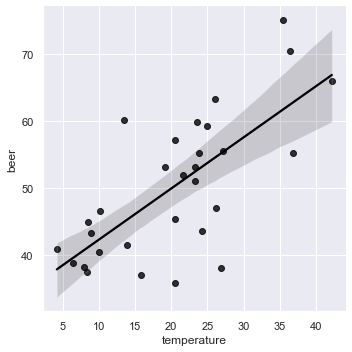

In [13]:
# scatter_kws: 산포도의 디자인 설정
# line_kws: 회귀직선의 디자인 설정
sns.lmplot(x = "temperature", y = "beer", data = beer, scatter_kws = {"color": "black"}, line_kws = {"color": "black"})

#음영부분: 회귀직선의 95% 신뢰구간

### 5.1.10. 모델을 이용한 예측

* 모델.predict() 사용법 익히기

In [14]:
# 파라미터가 없을 때, 훈련데이터 값이 그대로 출력
lm_model.predict()

array([50.301, 53.746, 42.264, 55.2  , 46.704, 37.825, 44.943, 54.511,
       52.445, 41.116, 54.664, 49.23 , 53.21 , 52.445, 41.04 , 52.598,
       45.25 , 61.783, 55.43 , 50.301, 42.418, 50.301, 51.143, 40.657,
       66.911, 52.904, 62.854, 41.423, 62.472, 39.509])

In [15]:
# 기온이 0도일 때, 맥주 매상의 기댓값
lm_model.predict(pd.DataFrame({"temperature":[0,1,2,3,4,5,6,7]}))

0    34.610215
1    35.375643
2    36.141070
3    36.906498
4    37.671926
5    38.437353
6    39.202781
7    39.968208
dtype: float64

In [16]:
# 추정한 파라미터만 표시
lm_model.params

Intercept      34.610215
temperature     0.765428
dtype: float64

In [17]:
# 맥주 매상의 기댓값
lm_model.predict(pd.DataFrame({"temperature":[20]}))

0    49.918767
dtype: float64

In [18]:
# beta0 + beta1 x 20의 계산값과 동일
beta0 = lm_model.params[0]
beta1 = lm_model.params[1]
temperature = 20

beta0 + beta1 * temperature

49.91876701095054

### 5.1.11 잔차계산

* 모델평가 방법: 예측값과 실제값이 얼마나 차이나는지 계산하기

#### (1) 모델.resid 로 잔차계산하기

In [24]:
# 잔차 계산
resid = lm_model.resid
resid.head()

0    -5.001481
1     5.554095
2    -1.864491
3   -17.200217
4    -9.703971
dtype: float64

#### (2) 직접 계산하기

In [25]:
# 예측값 계산(1) : 직접 계산하기
y_hat = beta0 + beta1 * beer.temperature
y_hat.head(3)

0    50.301481
1    53.745905
2    42.264491
Name: temperature, dtype: float64

In [39]:
# 예측값 계산(2) : 모델.fittedvalues 사용하기
lm_model.fittedvalues.head()

0    50.301481
1    53.745905
2    42.264491
3    55.200217
4    46.703971
dtype: float64

In [27]:
# 실제값 - 예측값 = 잔차
(beer.beer - y_hat).head(3)

0   -5.001481
1    5.554095
2   -1.864491
dtype: float64

In [30]:
np.mean((beer.beer - y_hat))

-3.126388037344441e-14

### 5.1.12 결정계수

* 모델의 적합도 평가방법 :  모델이 데이터를 얼마나 잘 설명해주는지 평가하는 지표
* 참고
    * https://ko.wikipedia.org/wiki/%EA%B2%B0%EC%A0%95%EA%B3%84%EC%88%98
    * https://en.wikipedia.org/wiki/Coefficient_of_determination

#### 결정계수(1) : 직접 계산하기

![{\displaystyle R^{2}={\frac {SS_{\text{reg}}}{SS_{\text{tot}}}}={\frac {SS_{\text{reg}}/n}{SS_{\text{tot}}/n}}}](https://wikimedia.org/api/rest_v1/media/math/render/svg/55776df55201c4bf54ba05eb9a2d63a64fb40528)

![SS_{\text{reg}}=\sum _{i}(f_{i}-{\bar {y}})^{2},](https://wikimedia.org/api/rest_v1/media/math/render/svg/107a9fb71364b9db3cf481e956ad2af11cba10a1)

![SS_{\text{tot}}=\sum _{i}(y_{i}-{\bar {y}})^{2},](https://wikimedia.org/api/rest_v1/media/math/render/svg/aec2d91094ee54fbf0f7912d329706ff016ec1bd)

In [40]:
mu = np.mean(beer.beer)
y = beer.beer
yhat = lm_model.predict()

np.sum((yhat - mu)**2) / np.sum((y - mu)**2)

0.5039593230611876

#### 결정계수(2) : 모델.rsqured 사용하기

In [41]:
lm_model.rsquared

0.5039593230611857

#### 결정계수(3) : 직접 계산하기

![{\displaystyle R^{2}\equiv 1-{SS_{\rm {res}} \over SS_{\rm {tot}}}\,}](https://wikimedia.org/api/rest_v1/media/math/render/svg/0ab5cc13b206a34cc713e153b192f93b685fa875)

![{\displaystyle SS_{\text{res}}=\sum _{i}(y_{i}-f_{i})^{2}=\sum _{i}e_{i}^{2}\,}](https://wikimedia.org/api/rest_v1/media/math/render/svg/2669c9340581d55b274d3b8ea67a7deb2225510b)

![SS_{\text{tot}}=\sum _{i}(y_{i}-{\bar {y}})^{2},](https://wikimedia.org/api/rest_v1/media/math/render/svg/aec2d91094ee54fbf0f7912d329706ff016ec1bd)

In [28]:
np.sum((yhat - mu)**2) + sum(resid**2)

3277.1146666666727

In [30]:
np.sum((y - mu)**2)

3277.114666666666

In [32]:
1 - np.sum(resid**2) / np.sum((y - mu)**2)

0.5039593230611856

### 5.1.13 수정된 결정계수

* 독립변수의 수가 늘어나는 것에 대해 패널티를 적용한 적용계수

* 과적합 해결

#### 수정된 결정계수(1) : 직접 계산하기

In [55]:
n = len(beer.beer)
s = 1
1 - ((np.sum(resid**2) / (n - s - 1)) / 
    (np.sum((y - mu)**2) / (n - 1)))

0.48624358459908523

#### 수정된 결정계수(2) : 모델.rsquared_adj 사용하기

In [36]:
lm_model.rsquared_adj

0.4862435845990851

### 5.1.14 잔차 그래프

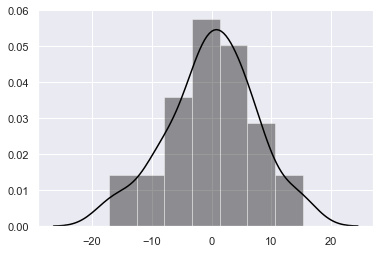

In [37]:
# 잔차의 히스토그램
sns.distplot(resid, color = 'black')

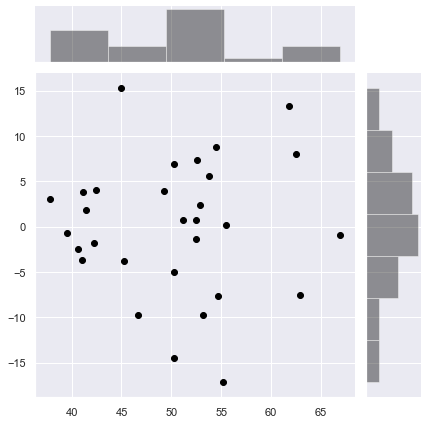

In [38]:
# 잔차의 산포도
sns.jointplot(lm_model.fittedvalues, resid, joint_kws={"color": "black"}, marginal_kws={"color": "black"})

### 5.1.15 Q-Q 플롯

* 이론상의 분위점과 실제 데이터의 분위점을 산포도로 나타냄
* 잔차가 정규분포에 근접하는지 시각적으로 판단

#### Q-Q 플롯(1) : sm.qqplot 사용하기

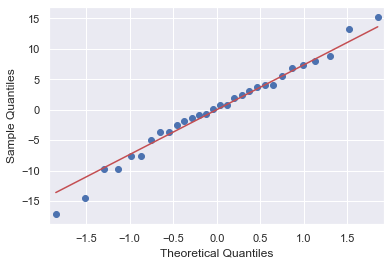

In [46]:
# Q-Q 플롯
fig = sm.qqplot(resid, line = "s")

#### Q-Q 플롯(2) : 직접 계산하기

In [52]:
# 작은 데이터가 앞에 오게 정렬
resid_sort = resid.sort_values()
resid_sort.head()

3    -17.200217
21   -14.501481
12    -9.710106
4     -9.703971
10    -7.664418
dtype: float64

In [53]:
# 가장 작은 데이터가 하위 몇 %에 위치하는지 계산
# 샘플사이즈 : 30 
1 / 31

0.032

In [54]:
# 모든 데이터에 대해 하위 몇 %에 위치하는지 계산
nobs = len(resid_sort)
cdf = np.arange(1, nobs + 1) / (nobs + 1)
cdf

array([0.032, 0.065, 0.097, 0.129, 0.161, 0.194, 0.226, 0.258, 0.29 ,
       0.323, 0.355, 0.387, 0.419, 0.452, 0.484, 0.516, 0.548, 0.581,
       0.613, 0.645, 0.677, 0.71 , 0.742, 0.774, 0.806, 0.839, 0.871,
       0.903, 0.935, 0.968])

In [55]:
# 분위점 계산: 정규분포의 퍼센트포인트를 사용
ppf = stats.norm.ppf(cdf)
ppf

array([-1.849, -1.518, -1.3  , -1.131, -0.989, -0.865, -0.753, -0.649,
       -0.552, -0.46 , -0.372, -0.287, -0.204, -0.122, -0.04 ,  0.04 ,
        0.122,  0.204,  0.287,  0.372,  0.46 ,  0.552,  0.649,  0.753,
        0.865,  0.989,  1.131,  1.3  ,  1.518,  1.849])

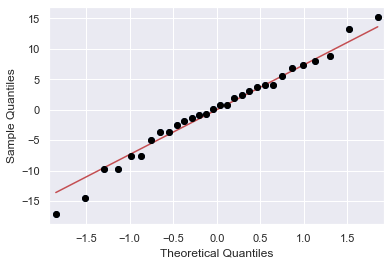

In [56]:
# Q-Q 플롯 그리기
# 가로: 분위점(ppf)
# 세로: 정렬된 데이터(resid_sort)
fig = sm.qqplot(resid, line = "s")
plt.plot(stats.norm.ppf(cdf), resid_sort, "o", color = "black")

### 5.1.16 summary 함수의 출력으로 보는 잔차 체크

In [45]:
# 추정 결과보기
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Mon, 15 Jun 2020   Prob (F-statistic):           1.11e-05
Time:                        22:33:41   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

| 항목                 | 설명                                       |
| -------------------- | ------------------------------------------ |
| **Prob(Omnibus)**    | 잔차의 정규성 검정                         |
| **Skew**             | 왜도(좌우 비대칭 정도) 양수인경우 오른쪽이 큼                     |
| **Kurtosis**         | 첨도(중심부 뾰족함 정도) 정규분포3                   |
| **Durbin-Watson**    | 잔차의 자기상관 체크, 2 전후이면 문제 없음 시계열분석 반드시 확인|
| **Jarque-Bera (JB)** | 정규성 검정(5.99보다 크면 정규분포 아님)   |
| **Prob(JB)**         | 잔차의 정규성 검정                         |

## [정리] 

### 독립변수(x)가 하나인 단순회귀 모델 작성 방법

1. 모델링: lm_model=**smf.ols**(formula = "beer ~ temperature", data = beer).fit()
2. 추정 결과 분석: lm_model.**summary()**
   * AIC 값 비교(lm_model**.aic**): Null모델 vs 회귀모델

3. 회귀모델을 활용한 예측: lm_model.**predict()**
4. 검증
   1. 잔차계산: lm_model.**resid**
   2. 결정계수(R^2): lm_model.**rsquared**
   3. 수정된 결정계수: lm_model.**rsquared_adj**


In [27]:
# 맥주 매상 데이터
beer = pd.read_csv("5-1-1-beer.csv")
print(beer.head())

   beer  temperature
0  45.3         20.5
1  59.3         25.0
2  40.4         10.0
3  38.0         26.9
4  37.0         15.8


In [35]:
print(beer.head(50))

    beer  temperature
0   45.3         20.5
1   59.3         25.0
2   40.4         10.0
3   38.0         26.9
4   37.0         15.8
5   40.9          4.2
6   60.2         13.5
7   63.3         26.0
8   51.1         23.3
9   44.9          8.5
10  47.0         26.2
11  53.2         19.1
12  43.5         24.3
13  53.2         23.3
14  37.4          8.4
15  59.9         23.5
16  41.5         13.9
17  75.1         35.5
18  55.6         27.2
19  57.2         20.5
20  46.5         10.2
21  35.8         20.5
22  51.9         21.6
23  38.2          7.9
24  66.0         42.2
25  55.3         23.9
26  55.3         36.9
27  43.3          8.9
28  70.5         36.4
29  38.8          6.4


In [36]:
lm_model.predict(pd.DataFrame({"temperature":[29]}))

0    56.807615
dtype: float64